In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import datetime as dt
import sqlalchemy

In [2]:
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect  existing database 
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# view all of the classes 
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references 
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) 
session = Session(engine)

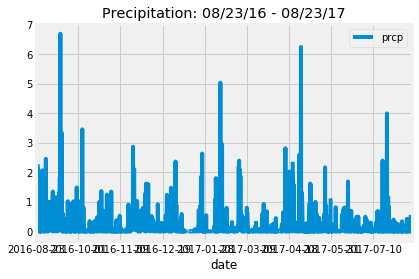

In [8]:
# Calculate  
latestDate = (session.query(Measurement.date)
             .order_by(Measurement.date.desc())
             .first())

latestDate = list(np.ravel(latestDate))[0]

latestDate = dt.datetime.strptime(latestDate, '%Y-%m-%d')
 
latestYear = int(dt.datetime.strftime(latestDate, '%Y'))
latestMonth = int(dt.datetime.strftime(latestDate,'%m'))
latestDay = int(dt.datetime.strftime(latestDate,  '%d'))
 
yearBefore = dt.date(latestYear, latestMonth, latestDay) - dt.timedelta(days=366)

 
rainData = (session.query(Measurement.date,Measurement.prcp)
            .filter(Measurement.date > yearBefore)
            .order_by(Measurement.date)
            .all())
 
rainTable = pd.DataFrame(rainData)
rainTable = rainTable.set_index('date')
 
rainTable = rainTable.sort_index(ascending=True)

rainTable.plot(title="Precipitation: 08/23/16 - 08/23/17")

In [9]:
rainTable.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [10]:
# query how many stations 
stationsCount = session.query(Station).count()
print(f"Station Count: {stationsCount}")

Station Count: 9


In [11]:
stationCounts = (session.query(Measurement.station, func.count(Measurement.station))
                .group_by(Measurement.station)
                .order_by(func.count(Measurement.station).desc())
                .all())
stationCounts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [12]:
# most active station
stationID = stationCounts[0][0]

stationName = (session.query(Station.name)
              .filter_by(station = stationID))

stationName = stationName[0][0]
print(f"Most active station is {stationID}: {stationName}.")

Most active station is USC00519281: WAIHEE 837.5, HI US.


In [13]:
# max temp 
maxTemp = (session.query(func.max(Measurement.tobs))
                  .filter(Measurement.station == stationID))
maxTemp = '{0:.3}'.format(maxTemp[0][0])
print(f"The highest temperature recorded there is {maxTemp} degrees Farenheit.")

The highest temperature recorded there is 85.0 degrees Farenheit.


In [14]:
# min temp 
minTemp = (session.query(func.min(Measurement.tobs))
                  .filter(Measurement.station == stationID))
minTemp = '{0:.3}'.format(minTemp[0][0])

print(f"Lowest temperature recored is {minTemp} degrees Farenheit.")

Lowest temperature recored is 54.0 degrees Farenheit.


In [15]:
# avg temp 
avgTemp = (session.query(func.avg(Measurement.tobs))
                  .filter(Measurement.station == stationID))
avgTemp = '{0:.3}'.format(avgTemp[0][0])
print(f"The average temperature recorded there is {avgTemp} degrees Farenheit.")

The average temperature recorded there is 71.7 degrees Farenheit.


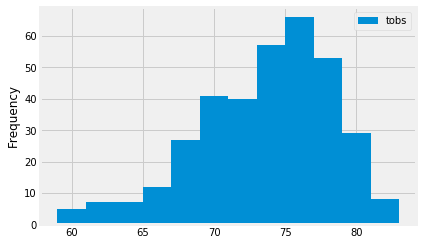

In [16]:
tempData = (session.query(Measurement.date, Measurement.tobs)
                   .filter(Measurement.date > yearBefore)
                   .filter(Measurement.station == stationID)
                   .order_by(Measurement.date)
                   .all())

#convert query object to data frame
tempTable = pd.DataFrame(tempData)
tempTable = tempTable.set_index('date')

#sort by date
tempTable = tempTable.sort_index(ascending=True)

#histogram plot with pandas
tempTable.plot(kind='hist', bins=12)